# Lab 3

__Team Members__
- Name 1: Jorge Olmos
- Name 2: Bosang Yun
- Name 3: Yucheol Shin
- Name 4: Siu Wai Yeung

# Content
* [Business Understanding](#business-understanding)
* [Data Understanding](#data-understanding)
    - [Part 1](#data-understanding-part1)
    - [Part 2](#data-understanding-part2)
* [Modeling Evaluation](#deployment)
    - [Train and Adjust Parameters](#train-adjust)
    - [Evaluate and Compare](#evaluate-compare)
    - [Visualize Resutls](#visualize-results)
    - [Summarize Rammifications](#summarize-rammifications)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

# Importing Data and Cleaning

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv') # read in the csv file
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [2]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Loading library

In [67]:
%%R
library(dplyr)
library(arules)
library(arulesViz)
library(RColorBrewer)

# Loading Data

In [135]:
%%R
bookings=read.csv("https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv")
# bookings


## Deleting unnecessary variables 

### todo exaplain why we're removing uncessary data

In [137]:
%%R
head(bookings)

summary(bookings$adr)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -6.38   69.29   94.58  101.83  126.00 5400.00 


In [139]:
%%R
###################### Deleting unnecessary variables  ###########################
bookings <- subset(bookings, select = -c(agent, country,company,meal,arrival_date_week_number, reservation_status_date))

## Outliers

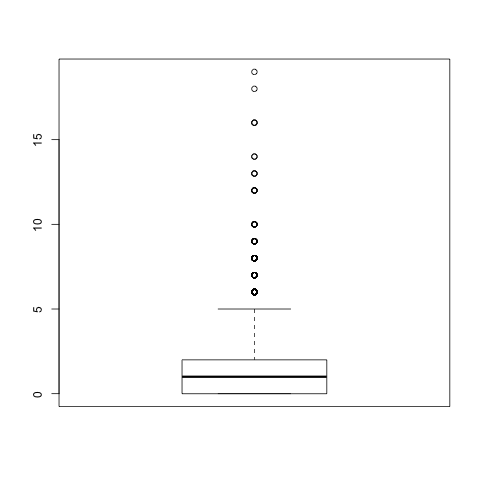

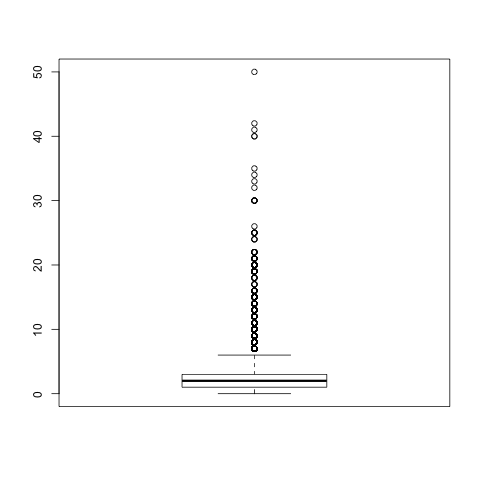

In [140]:
%%R
###################### Outliers ###########################
# Boxplot of stays_in_weekend_nights and stays_in_week_nights
boxplot(bookings$stays_in_weekend_nights) # Very skewed
boxplot(bookings$stays_in_week_nights)  # Very skewed


# Identifying outliers in stays_in_weekend_nights, stays_in_week 
outliers1 <- boxplot(bookings$stays_in_weekend_nights, plot=FALSE)$out
outliers2 <- boxplot(bookings$stays_in_week_nights, plot=FALSE)$out
length(outliers1) # Total of 265 outliers identified
length(outliers2)

bookings<- bookings[-which(bookings$stays_in_weekend_nights %in% outliers1),]
bookings<- bookings[-which(bookings$stays_in_week_nights %in% outliers2),]

In [150]:
%%R

summary(bookings$adr)

low_bookings <- bookings %>% filter(bookings$adr == "Low")

#head(bookings)
summ_adr <- summary(bookings$adr)
summ_lead_time <- summary(bookings$lead_time)
#summ_stays_in_weeks <- summary(bookings$stays_in_weeks)

adr_breaks = c(-Inf, summ_adr['1st Qu.'],summ_adr['3rd Qu.'],Inf )
lead_time_breaks = c(-Inf,summ_lead_time['1st Qu.'], summ_lead_time['3rd Qu.'], Inf)
#stays_in_weaks_breaks = c(-Inf,summ_stays_in_weeks['1st Qu.'], summ_stays_in_weeks['3rd Qu.'], Inf)


        1st Qu. 3rd Qu.         
   -Inf      17     158     Inf 


## Variable Imputation
    todo: describe work below

In [152]:
%%R 

################### Changing binary values to Yes and No #####################
bookings$is_canceled <- ifelse(bookings$is_canceled == 1, "Yes", "No")
bookings$is_repeated_guest <- ifelse(bookings$is_repeated_guest == 1, "Yes", "No")


bookings <- discretizeDF(bookings, methods = list(
lead_time = list(method = "Fixed", breaks = lead_time_breaks, 
   labels = c("Low", "Medium", "High")),
 adr = list(method = "Fixed", breaks = adr_breaks , 
   labels = c("Low", "Medium", "High")),
 stays_in_week_nights = list(method = "frequency", breaks = 3, 
   labels = c("Low", "Medium", "High"))
 ),
 default = list(method = "none")
 )



bookings$monthNum <- match(bookings$arrival_date_month, month.name)
bookings$fullDate <- as.Date(with(bookings, paste(arrival_date_year, monthNum, arrival_date_day_of_month,sep="-")), "%Y-%m-%d")
bookings$weekday <- weekdays(bookings$fullDate)
bookings <- subset(bookings, select=-c(monthNum,fullDate,arrival_date_day_of_month))
bookings$weekday

# Assigning seasons to arrival_date_month
bookings <- bookings %>% 
mutate(arrival_date_month = case_when(
    arrival_date_month %in% c('December','January', 'February') ~ 'Winter',
    arrival_date_month %in% c('March','April', 'May') ~ 'Spring',
    arrival_date_month %in% c( 'June','July','August') ~ 'Summer',
    arrival_date_month %in% c('September','October', 'November') ~ 'Fall'
    ))

summary(bookings$lead_time)

bookings<-subset(bookings, select=-(arrival_date_year))

# Factoring the dataframe
index <- 1:ncol(bookings)
bookings[ , index] <- lapply(bookings[ , index], as.factor)
str(bookings)

trans <- as(bookings, "transactions") # now the transaction data is ready for analysis
trans

'data.frame':	116036 obs. of  25 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 1 level "No": 1 1 1 1 1 1 1 1 1 1 ...
 $ lead_time                     : Factor w/ 3 levels "Low","Medium",..: 3 3 1 1 1 1 1 1 2 2 ...
 $ arrival_date_month            : Factor w/ 4 levels "Fall","Spring",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ stays_in_weekend_nights       : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_week_nights          : Factor w/ 3 levels "Low","Medium",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ adults                        : Factor w/ 14 levels "0","1","2","3",..: 3 3 2 2 3 3 3 3 3 3 ...
 $ children                      : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ babies                        : Factor w/ 5 levels "0","1","2","9",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ market_segment                : Factor w/ 8 levels "Aviation","Complementary",..:

            hotel is_canceled lead_time arrival_date_month
1    Resort Hotel           0      High             Summer
2    Resort Hotel           0      High             Summer
3    Resort Hotel           0       Low             Summer
4    Resort Hotel           0       Low             Summer
5    Resort Hotel           0       Low             Summer
6    Resort Hotel           0       Low             Summer
7    Resort Hotel           0       Low             Summer
8    Resort Hotel           0       Low             Summer
9    Resort Hotel           1    Medium             Summer
10   Resort Hotel           1    Medium             Summer
11   Resort Hotel           1       Low             Summer
12   Resort Hotel           0    Medium             Summer
13   Resort Hotel           0    Medium             Summer
14   Resort Hotel           0       Low             Summer
15   Resort Hotel           0    Medium             Summer
16   Resort Hotel           0    Medium             Summ

276  Resort Hotel           0    Medium             Summer
277  Resort Hotel           0    Medium             Summer
278  Resort Hotel           0    Medium             Summer
279  Resort Hotel           0    Medium             Summer
280  Resort Hotel           0    Medium             Summer
281  Resort Hotel           1    Medium             Summer
282  Resort Hotel           0    Medium             Summer
283  Resort Hotel           0      High             Summer
284  Resort Hotel           1    Medium             Summer
285  Resort Hotel           0    Medium             Summer
286  Resort Hotel           0    Medium             Summer
287  Resort Hotel           0    Medium             Summer
288  Resort Hotel           1    Medium             Summer
289  Resort Hotel           0    Medium             Summer
290  Resort Hotel           0    Medium             Summer
291  Resort Hotel           0    Medium             Summer
292  Resort Hotel           0       Low             Summ

552  Resort Hotel           1    Medium             Summer
553  Resort Hotel           0    Medium             Summer
554  Resort Hotel           1    Medium             Summer
555  Resort Hotel           0    Medium             Summer
556  Resort Hotel           1       Low             Summer
557  Resort Hotel           0    Medium             Summer
558  Resort Hotel           0    Medium             Summer
559  Resort Hotel           1       Low             Summer
560  Resort Hotel           1    Medium             Summer
561  Resort Hotel           0    Medium             Summer
562  Resort Hotel           0    Medium             Summer
563  Resort Hotel           1    Medium             Summer
564  Resort Hotel           0       Low             Summer
565  Resort Hotel           0       Low             Summer
566  Resort Hotel           0    Medium             Summer
567  Resort Hotel           0       Low             Summer
568  Resort Hotel           1    Medium             Summ

828  Resort Hotel           1    Medium             Summer
829  Resort Hotel           0    Medium             Summer
830  Resort Hotel           0       Low             Summer
831  Resort Hotel           1       Low             Summer
832  Resort Hotel           1       Low             Summer
833  Resort Hotel           1    Medium             Summer
834  Resort Hotel           1       Low             Summer
835  Resort Hotel           1       Low             Summer
836  Resort Hotel           1       Low             Summer
837  Resort Hotel           0      High             Summer
838  Resort Hotel           0    Medium             Summer
839  Resort Hotel           1      High             Summer
840  Resort Hotel           0    Medium             Summer
841  Resort Hotel           0    Medium             Summer
842  Resort Hotel           0    Medium             Summer
843  Resort Hotel           0      High             Summer
844  Resort Hotel           1    Medium             Summ

1104 Resort Hotel           0    Medium             Summer
1105 Resort Hotel           0       Low             Summer
1106 Resort Hotel           1    Medium             Summer
1107 Resort Hotel           1    Medium             Summer
1108 Resort Hotel           0       Low             Summer
1109 Resort Hotel           1    Medium             Summer
1110 Resort Hotel           0    Medium             Summer
1111 Resort Hotel           0       Low             Summer
1112 Resort Hotel           1    Medium             Summer
1113 Resort Hotel           0    Medium             Summer
1114 Resort Hotel           1       Low             Summer
1115 Resort Hotel           0      High             Summer
1116 Resort Hotel           0    Medium             Summer
1117 Resort Hotel           1       Low             Summer
1118 Resort Hotel           0       Low             Summer
1119 Resort Hotel           0    Medium             Summer
1120 Resort Hotel           0    Medium             Summ

1380 Resort Hotel           0       Low             Summer
1381 Resort Hotel           1    Medium             Summer
1382 Resort Hotel           0    Medium             Summer
1383 Resort Hotel           1    Medium             Summer
1384 Resort Hotel           1    Medium             Summer
1385 Resort Hotel           0    Medium             Summer
1386 Resort Hotel           0       Low             Summer
1387 Resort Hotel           1    Medium             Summer
1388 Resort Hotel           0       Low             Summer
1389 Resort Hotel           1      High             Summer
1390 Resort Hotel           1      High             Summer
1391 Resort Hotel           1      High             Summer
1392 Resort Hotel           0       Low             Summer
1393 Resort Hotel           1    Medium             Summer
1394 Resort Hotel           0       Low             Summer
1395 Resort Hotel           0    Medium             Summer
1396 Resort Hotel           1    Medium             Summ

1673 Resort Hotel           0      High               Fall
1674 Resort Hotel           1       Low               Fall
1675 Resort Hotel           0       Low               Fall
1676 Resort Hotel           0       Low               Fall
1677 Resort Hotel           0    Medium               Fall
1678 Resort Hotel           1       Low               Fall
1679 Resort Hotel           1       Low               Fall
1680 Resort Hotel           0    Medium               Fall
1681 Resort Hotel           0       Low               Fall
1682 Resort Hotel           0       Low               Fall
1683 Resort Hotel           0      High               Fall
1684 Resort Hotel           1       Low               Fall
1685 Resort Hotel           0      High               Fall
1686 Resort Hotel           0      High               Fall
1687 Resort Hotel           0    Medium               Fall
1688 Resort Hotel           0      High               Fall
1689 Resort Hotel           1      High               Fa

2058 Resort Hotel           1    Medium               Fall
2059 Resort Hotel           0    Medium               Fall
2060 Resort Hotel           0    Medium               Fall
2061 Resort Hotel           0       Low               Fall
2062 Resort Hotel           0    Medium               Fall
2063 Resort Hotel           0       Low               Fall
2064 Resort Hotel           0       Low               Fall
2065 Resort Hotel           0       Low               Fall
2066 Resort Hotel           0       Low               Fall
2067           1    Medium               Fall
2138 Resort Hotel           0    Medium               Fall
2139 Resort Hotel           0       Low               Fall
2140 Resort Hotel           0       Low               Fall
2141 Resort Hotel           0       Low               Fall
2142 Resort Hotel           1    Medium               Fall
2143 Resort Hotel           1    Medium               Fall
2144 Resort Hotel           1       Low               Fall
2145 Resor

From cffi callback <function _consolewrite_ex at 0x10d6fb940>:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 129, in _consolewrite_ex
    @ffi_proxy.callback(ffi_proxy._consolewrite_ex_def,
KeyboardInterrupt


           0    Medium               Fall
2495 Resort Hotel           0    Medium               Fall
2496 Resort Hotel           1    Medium               Fall
2497 Resort Hotel           0    Medium               Fall
2498 Resort Hotel           0    Medium               Fall
2499 Resort Hotel           0    Medium               Fall
2500 Resort Hotel           0    Medium               Fall
2501 Resort Hotel           0    Medium               Fall
2502 Resort Hotel           0    Medium               Fall
2503 Resort Hotel           0    Medium               Fall
2504 Resort Hotel           0    Medium               Fall
2505 Resort Hotel           0    Medium               Fall
2506 Resort Hotel           0      High               Fall
2507 Resort Hotel           0    Medium               Fall
2508 Resort Hotel           0    Medium               Fall
2509 Resort Hotel           0    Medium               Fall
2510 Resort Hotel           0       Low               Fall
2511 Resort Ho

2936 Resort Hotel           1    Medium               Fall
2937 Resort Hotel           1    Medium               Fall
2938 Resort Hotel           1      High               Fall
2939 Resort Hotel           0    Medium               Fall
2940 Resort Hotel           1      High               Fall
2941 Resort Hotel           0      High               Fall
2942 Resort Hotel           1    Medium               Fall
2943 Resort Hotel           0    Medium               Fall
2944 Resort Hotel           1    Medium               Fall
2945 Resort Hotel           1    Medium               Fall
2946 Resort Hotel           0    Medium               Fall
2947 Resort Hotel           0       Low               Fall
2948 Resort Hotel           0    Medium               Fall
2949 Resort Hotel           1    Medium               Fall
2950 Resort Hotel           1    Medium               Fall
2951 Resort Hotel           0    Medium               Fall
2952 Resort Hotel           1    Medium               Fa

60                         27                       0               Medium
61                         27                       0               Medium
62                         27                       0               Medium
63                         27                       0                 High
64                         27                       0                 High
65                         27                       0                 High
66                         27                       0               Medium
67                         27                       0               Medium
68                         27                       0               Medium
69                         27                       0               Medium
70                         27                       0               Medium
71                         27                       0               Medium
72                         27                       0               Medium
73                       

409                        29                       0                 High
410                        29                       0                 High
411                        29                       2                 High
412                        29                       2                 High
413                        29                       2                 High
414                        29                       0               Medium
415                        29                       0               Medium
416                        29                       0               Medium
417                        29                       0               Medium
418                        29                       0               Medium
419                        29                       2                 High
420                        29                       0               Medium
421                        29                       0               Medium
422                      

791                        31                       2                 High
792                        31                       2                 High
793                        31                       2                 High
794                        31                       2                 High
795                        31                       0                  Low
796                        31                       0                  Low
797                        31                       0                  Low
798                        31                       0                  Low
799                        31                       0               Medium
800                        31                       0                 High
801                        31                       0                 High
802                        31                       0                 High
803                        31                       0                 High
804                      

1148                       33                       2                 High
1149                       33                       4                 High
1150                       33                       6                 High
1151                       34                       1                  Low
1152                       34                       1                  Low
1153                       34                       1                  Low
1154                       34                       1                  Low
1155                       34                       1                  Low
1156                       34                       1                  Low
1157                       34                       1                  Low
1158                       34                       1                  Low
1159                       34                       1                  Low
1160                       34                       1                  Low
1161                     

1442                       35                       2                 High
1443                       35                       2                 High
1444                       35                       2                 High
1445                       35                       2                 High
1446                       36                       1                  Low
1447                       36                       2                  Low
1448                       36                       2                  Low
1449                       36                       2                  Low
1450                       36                       2                  Low
1451                       36                       2                  Low
1452                       36                       2               Medium
1453                       36                       2               Medium
1454                       36                       2                 High
1455                     

1975                       39                       0                  Low
1976                       39                       0               Medium
1977                       39                       0               Medium
1978                       39                       0               Medium
1979                       39                       0               Medium
1980                       39                       0               Medium
1981                       39                       2                 High
1982                       39                       2                 High
1983                       39                       2                 High
1984                       39                       2                 High
1985                       39                       2                 High
1986                       39                       2                 High
1987                       39                       2                 High
1988                     

2337                       41                       1               Medium
2338                       41                       1               Medium
2339                       41                       1               Medium
2340                       41                       2               Medium
2341                       41                       2               Medium
2342                       41                       2               Medium
2343                       41                       2               Medium
2344                       41                       2                 High
2345                       41                       2                 High
2346                       41                       2                 High
2347                       41                       0                  Low
2348                       41                       0                  Low
2349                       41                       0                  Low
2350                     

2734                       44                       0                  Low
2735                       44                       0                  Low
2736                       44                       0                 High
2737                       44                       0                 High
2738                       44                       0                 High
2739                       44                       0                 High
2740                       44                       1                 High
2741                       44                       3                 High
2742                       44                       2                 High
2743                       44                       0                  Low
2744                       44                       0                  Low
2745                       44                       0                  Low
2746                       44                       0               Medium
2747                     

3062                       46                       0                 High
3063                       46                       0                 High
3064                       46                       1                 High
3065                       46                       1                 High
3066                       46                       1                 High
3067                       46                       1                 High
3068                       46                       1                 High
3069                       46                       0               Medium
3070                       46                       0                  Low
3071                       46                       0                  Low
3072                       46                       0                  Low
3073                       46                       0                  Low
3074                       46                       0               Medium
3075                     

276       2        0      0        BB     PRT      Online TA
277       2        0      1        BB     GBR      Online TA
278       2        0      0        BB     DNK      Online TA
279       2        1      0        HB     GBR      Online TA
280       2        0      0        HB     GBR      Online TA
281       2        1      0        HB     PRT  Offline TA/TO
328       2        0      0        HB     GBR  Offline TA/TO
329       2       10      0        BB     PRT  Offline TA/TO
330       2        0      0        BB     GBR  Offline TA/TO
331       2        0      0        BB     PRT      Online TA
332       2        2      0        BB     BEL      Online TA
333       2        0      0        BB     ESP      Online TA
334       2        0      0        BB     FRA      Online TA
335       2        0      0        BB     ESP      Online TA
336       2        0      0        BB     BEL      Online TA
337       2        0      0        BB     ITA  Offline TA/TO
338       2        0    

721       2        0      0        HB     PRT  Offline TA/TO
722       2        0      0        BB     GBR  Offline TA/TO
723       2        0      0        BB     PRT      Online TA
724       2        2      0        BB     PRT      Online TA
725       2        0      0        BB     PRT      Online TA
726       2        2      0        BB     PRT      Online TA
727       1        0      0        HB     PRT      Online TA
728       2        0      0        HB     PRT      Online TA
729       2        0      0        BB     PRT      Online TA
730       2        0      0        HB     PRT      Online TA
731       2        0      0        BB     ESP         Direct
732       2        0      0        HB     PRT      Online TA
733       2        0      0        BB     PRT      Online TA
734       2        0      0        BB     ESP         Direct
735       2        0      0        BB     PRT      Online TA
736       2        0      0        HB     ESP  Offline TA/TO
737       2        0    

1160      2        0      0        BB     BRA      Online TA
1161      2        0      0        BB     PRT      Corporate
1162      2        0      0        BB     PRT      Corporate
1163      2        0      0        BB     PRT      Corporate
1164      2        0      0        BB     PRT      Online TA
1165      2        0      0        BB     PRT      Online TA
1166      2        0      0        BB     PRT      Online TA
1167      2        0      0        BB     PRT      Online TA
1168      2        0      0        BB     PRT      Online TA
1169      2        0      0        BB     PRT      Online TA
1170      2        1      0        HB     PRT      Online TA
1171      2        0      0        BB     PRT      Online TA
1172      2        0      0        BB     PRT      Online TA
1173      2        0      0        BB     PRT      Online TA
1174      2        2      0        BB     PRT      Online TA
1175      2        0      0        BB     PRT  Offline TA/TO
1176      2        2    

1595      2        0      0        HB     GBR  Offline TA/TO
1596      2        0      0        BB     GBR  Offline TA/TO
1597      2        0      0        BB     PRT         Direct
1598      2        0      0        BB     PRT      Online TA
1599      2        0      0        FB     ESP  Offline TA/TO
1600      2        0      0        BB     GBR         Direct
1601      2        0      0        BB     PRT      Online TA
1602      2        2      0        BB     PRT         Direct
1603      2        0      0        BB     PRT         Direct
1604      2        2      0        HB     PRT      Online TA
1605      2        0      0        BB     PRT  Offline TA/TO
1606      2        0      0        BB     PRT  Offline TA/TO
1607      2        0      0        BB     SWE  Offline TA/TO
1608      2        0      0        BB     DEU      Online TA
1609      2        0      0        BB     GBR  Offline TA/TO
1610      1        2      0        BB     PRT      Online TA
1611      2        0    

2004     26        0      0        BB     PRT  Offline TA/TO
2005      2        0      0        BB     PRT         Direct
2006      2        0      0        BB      CN  Offline TA/TO
2007      2        0      0        BB     GBR      Online TA
2008      2        0      0        BB     PRT      Online TA
2009      2        0      0        BB      CN      Online TA
2010      2        0      0        BB     DEU      Corporate
2011      2
2059      2        0      0        BB     IRL  Offline TA/TO
2060      2        0      0        HB     BLR      Online TA
2061      2        0      0        BB     PRT         Direct
2062      1        1      0        BB     PRT         Direct
2063      2        0      0        BB     DEU      Corporate
2064      2        0      0        BB     PRT      Corporate
2065      1        0      0        HB     FRA  Offline TA/TO
2066      1        0      0        HB     FRA  Offline TA/TO
2067      2        0      0        HB     FRA  Offline TA/TO
2068      2 

2470      2        0      0        BB     PRT      Online TA
2471      2        0      0        BB     PRT      Online TA
2472      2        0      0        BB     GBR  Offline TA/TO
2473      2        0      0        BB     IRL      Online TA
2474      2        0      0        BB     IRL      Online TA
2475      2        0      0        BB     PRT      Online TA
2476      2        0      0        BB     PRT      Online TA
2477      1        0      0        BB     PRT      Corporate
2478      2        0      0        BB     ESP      Online TA
2479      2        0      0        BB     PRT  Offline TA/TO
2480      2        0      0        BB     PRT  Offline TA/TO
2481      2        0      0        BB     PRT         Direct
2482      1        0      0        BB     PRT  Offline TA/TO
2483      2        0      0        HB     ESP      Online TA
2484      2        0      0        BB     ESP      Online TA
2485      2        0      0        HB     ESP      Online TA
2486      2        0    

2910      2        0      0        BB     GBR  Offline TA/TO
2911      2        0      0        BB     PRT      Online TA
2912      2        0      0        BB     PRT      Online TA
2913      1        0      0        BB     FRA      Corporate
2914      1        0      0        BB     AUT      Corporate
2915      1        0      0        BB     AUT      Corporate
2916      1        0      0        BB     AUT      Corporate
2917      1        0      0        BB     AUT      Corporate
2918      1        0      0        BB     FRA      Corporate
2919      1        0      0        BB     AUT      Corporate
2920      2        0      0        BB     PRT      Online TA
2921      2        0      0        BB     PRT      Online TA
2922      2        0      1        BB     PRT  Offline TA/TO
2923      2        1      0        BB     PRT  Offline TA/TO
2924      2        0      1        BB     PRT  Offline TA/TO
2925      2        0      0        BB     ESP         Direct
2926      2        1    

113                 TA/TO                 0                      0
114                 TA/TO                 0                      0
115                 TA/TO                 0                      0
116                 TA/TO                 0                      0
117                 TA/TO                 0                      0
118                 TA/TO                 0                      0
119                Direct                 0                      0
120                 TA/TO                 0                      0
121                 TA/TO                 0                      0
122                 TA/TO                 0                      0
123                Direct                 0                      0
124                 TA/TO                 0                      0
125                 TA/TO                 0                      0
126                Direct                 0                      0
127                 TA/TO                 0                   

527                Direct                 0                      0
528                 TA/TO                 0                      0
529                 TA/TO                 0                      0
530                Direct                 0                      0
531                 TA/TO                 0                      0
532                Direct                 0                      0
533                Direct                 0                      0
534                Direct                 0                      0
535                 TA/TO                 0                      0
536                 TA/TO                 0                      0
537                 TA/TO                 0                      0
538                 TA/TO                 0                      0
539                Direct                 0                      0
540                 TA/TO                 0                      0
541                Direct                 0                   

932                 TA/TO                 0                      0
933                 TA/TO                 0                      0
934                Direct                 0                      0
935                 TA/TO                 0                      0
936             Corporate                 0                      0
937                 TA/TO                 0                      0
938                 TA/TO                 0                      0
939                 TA/TO                 0                      0
940                 TA/TO                 0                      0
941                 TA/TO                 0                      0
942                 TA/TO                 0                      0
943                Direct                 0                      0
944                 TA/TO                 0                      0
945                 TA/TO                 0                      0
946                 TA/TO                 0                   

1316               Direct                 0                      0
1317               Direct                 0                      0
1318                TA/TO                 0                      0
1319            Corporate                 0                      0
1320                TA/TO                 0                      0
1321               Direct                 0                      0
1322               Direct                 0                      0
1323                TA/TO                 0                      0
1324                TA/TO                 0                      0
1325                TA/TO                 0                      0
1326                TA/TO                 0                      0
1327                TA/TO                 0                      0
1328                TA/TO                 0                      0
1329                TA/TO                 0                      0
1330                TA/TO                 0                   

1714                TA/TO                 0                      0
1715                TA/TO                 0                      0
1716                TA/TO                 0                      0
1717                TA/TO                 0                      0
1718               Direct                 0                      0
1719                TA/TO                 0                      0
1720                TA/TO                 0                      0
1721                TA/TO                 0                      0
1722                TA/TO                 0                      0
1723                TA/TO                 0                      0
1724               Direct                 0                      0
1725                TA/TO                 0                      0
1726                TA/TO                 0                      0
1727                TA/TO                 0                      0
1728               Direct                 0                   

2100                TA/TO                 0                      0
2101               Direct                 0                      0
2102                TA/TO                 0                      0
2103                TA/TO                 0                      0
2104                TA/TO                 0                      0
2105                TA/TO                 0                      0
2106                TA/TO                 0                      0
2107                TA/TO                 0                      0
2108                TA/TO                 0                      0
2109                TA/TO                 0                      0
2110                TA/TO                 0                      0
2111                TA/TO                 0                      0
2112                TA/TO                 0                      0
2113                TA/TO                 0                      0
2114                TA/TO                 0                   

2506                TA/TO                 0                      0
2507               Direct                 0                      0
2508               Direct                 0                      0
2509               Direct                 0                      0
2510               Direct                 0                      0
2511               Direct                 0                      0
2512                TA/TO                 0                      0
2513                TA/TO                 0                      0
2514                TA/TO                 0                      0
2515                TA/TO                 0                      0
2516                TA/TO                 0                      0
2517                TA/TO                 0                      0
2518               Direct                 0                      0
2519               Direct                 0                      0
2520               Direct                 0                   

2890                TA/TO                 0                      0
2891            Corporate                 0                      0
2892            Corporate                 0                      0
2893            Corporate                 0                      0
2894            Corporate                 0                      0
2895            Corporate                 0                      0
2896            Corporate                 0                      0
2897                TA/TO                 0                      0
2898                TA/TO                 0                      0
2899            Corporate                 0                      0
2900                TA/TO                 0                      0
2901            Corporate                 0                      0
2902                TA/TO                 0                      0
2903                TA/TO                 0                      0
2904                TA/TO                 0                   

21                                0                  F                  F
22                                0                  A                  A
23                                0                  A                  A
24                                0                  D                  D
25                                0                  D                  I
26                                0                  D                  D
27                                0                  D                  D
28                                0                  E                  E
29                                0                  A                  A
30                                0                  D                  D
31                                0                  A                  A
32                                0                  D                  D
33                                0                  E                  E
34                                0   

337                               0                  D                  D
338                               0                  A                  A
339                               0                  A                  A
340                               0                  A                  D
341                               0                  E                  E
342                               0                  G                  G
343                               0                  D                  D
344                               0                  F                  F
345                               0                  H                  H
346                               0                  D                  D                              0                  A                  D
428                               0                  A                  C
429                               0                  A                  A
430                               0        

704                               0                  A                  D
705                               0                  A                  A
706                               0                  G                  G
707                               0                  E                  E
708                               0                  D                  D
709                               0                  A                  A
710                               0                  A                  D
711                               0                  A                  D
712                               0                  A                  A
713                               0                  E                  E
714                               0                  E                  E
715                               0                  A                  A
716                               0                  E                  E
717                               0   

1087                              0                  A                  A
1088                              0                  D                  E
1089                              0                  D                  D
1090                              0                  D                  E
1091                              0                  D                  D
1092                              0                  A                  A
1093                              0                  A                  B
1094                              0                  D                  D
1095                              0                  G                  G
1096                              0                  A                  D
1097                              0                  D                  F
1098                              0                  A                  E
1099                              0                  D                  F
1100                              0   

1454                              0                  E                  F
1455                              0                  D                  D
1456                              0                  D                  D
1457                              0                  E                  E
1458                              0                  G                  G
1459                              0                  A                  A
1460                              0                  E                  E
1461                              0                  A                  A
1462                              0                  F                  F
1463                              0                  E                  E
1464                              0                  A                  A
1465                              0                  A                  A
1466                              0                  A                  A
1467                              0   

1766                              0                  C                  C
1767                              0                  F                  F
1768                              0                  E                  E
1769                              0                  A                  A
1770                              0                  D                  D                  E
1838                              0                  H                  H
1839                              0                  A                  A
1840                              0                  A                  A
1841                              0                  A                  A
1842                              0                  A                  A
1843                              0                  A                  A
1844                              0                  A                  A
1845                              0                  A                  A
1846               

2132                              0                  D                  D
2133                              0                  A                  C
2134                              0                  A                  A
2135                              0                  A                  A
2136                              0                  A                  A
2137                              0                  A                  A
2138                              0                  A                  A
2139                              0                  A                  A
2140                              0                  A                  C
2141                              0                  E                  G
2142                              0                  A                  A
2143                              0                  A                  A
2144                              0                  A                  A
2145                              0   

2525                              0                  G                  G
2526                              0                  D                  D
2527                              0                  A                  A
2528                              0                  E                  E
2529                              0                  A                  A
2530                              0                  A                  A
2531                              0                  A                  I
2532                              0                  A                  I
2533                              0                  A                  A
2534                              0                  A                  A
2535                              0                  A                  A
2536                              0                  G                  G
2537                              0                  A                  A
2538                              0   

2745                              0                  D                  D
2746                              0                  D                  D
2747                              0                  A                  A
2748                              0                  A                  A
2749                              0                  A                  A
2750                              0                  A                  D
2751                              0                  A                  A
2752                              0                  E                  E
2753                              0                  A                  A
2754                              0                  A                  A
2755                              0                  A                  D
2756                              0                  F                  F
2757                              0

From cffi callback <function _consolewrite_ex at 0x10d6fb940>:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 135, in _consolewrite_ex
    consolewrite_print(s)
  File "/opt/anaconda3/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 118, in consolewrite_print
    print(s, end='', flush=True)
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/iostream.py", line 352, in flush
    if not evt.wait(self.flush_timeout):
  File "/opt/anaconda3/lib/python3.8/threading.py", line 558, in wait
    signaled = self._cond.wait(timeout)
  File "/opt/anaconda3/lib/python3.8/threading.py", line 306, in wait
    gotit = waiter.acquire(True, timeout)
KeyboardInterrupt


                  A                  A
2758                              0                  A                  A
2759                              0                  A                  A
2760                              0                  A                  A
2761                              0                  E                  E
2762                              0                  D                  D
2763                              0                  A                  A
2764                              0                  E                  E
2765                              0                  D                  D
2766                              0                  E                  E
2767                              0                  A                  E
2768                              0                  A                  D
2769                              0                  A                  A
2770                              0                  A                  A

3088                              0                  D                  D
3089                              0                  A                  A
3090                              0                  A                  A
3091                              0                  A                  A
3092                              0                  A                  A
3093                              0                  A                  A
3094                              0                  A                  A
3095                              0                  A                  A
3096                              0                  A                  A
3097                              0                  A                  A
3098                              0                  D                  D
3099                              0                  A                  A
3100                              0                  A                  A
3101                              0   

191                0   No Deposit     8    NULL                    0
192                0   No Deposit    40    NULL                    0
193                0   No Deposit   127    NULL                    0
194                0   No Deposit   240    NULL                    0
195                0   No Deposit   240    NULL                    0
196                0   No Deposit   250    NULL                    0
197                0   No Deposit  NULL    NULL                    0
198                0   No Deposit   240    NULL                    0
199                0   No Deposit   240    NULL                    0
200                0   No Deposit  NULL    NULL                    0
201                0   No Deposit   240    NULL                    0
202                2   No Deposit   240    NULL                    0
203                0   No Deposit   240    NULL                    0
204                0   No Deposit    95    NULL                    0
205                2   No Deposit 

575                0   No Deposit   240    NULL                    0
576                0   No Deposit   241    NULL                    0
577                0   No Deposit   240    NULL                    0
578                0   No Deposit   240    NULL                    0
579                0   No Deposit   175    NULL                    0
580                0   No Deposit   240    NULL                    0
581                0   No Deposit   240    NULL                    0
582                0   No Deposit   250    NULL                    0
583                1   No Deposit   240    NULL                    0
584                0   No Deposit   241    NULL                    0
585                0   No Deposit  NULL    NULL                    0
586                0   No Deposit   105    NULL                    0
587                0   No Deposit   240    NULL                    0
588                0   No Deposit   175    NULL                    0
589                1   No Deposit 

982                0   No Deposit   240    NULL                    0
983                1   No Deposit   250    NULL                    0
984                0   No Deposit   240    NULL                    0
985                0   No Deposit  NULL    NULL                    0
986                0   No Deposit   306    NULL                    0
987                0   No Deposit   240    NULL                    0
988                0   No Deposit   250    NULL                    0
989                0   No Deposit   240    NULL                    0
990                1   No Deposit   240    NULL                    0
991                0   No Deposit   240    NULL                    0
992                0   No Deposit   240    NULL                    0
993                0   No Deposit   240    NULL                    0
994                0   No Deposit   240    NULL                    0
995                0   No Deposit   242    NULL                    0
996                0   No Deposit 

1318               1   No Deposit   241    NULL                    0
1319               0   No Deposit  NULL     154                    0
1320               0   No Deposit   240    NULL                    0
1321               0   No Deposit   250    NULL                    0
1322               0   No Deposit  NULL    NULL                    0
1323                    0
1371               1   No Deposit   240    NULL                    0
1372               0   No Deposit   134    NULL                    0
1373               0   No Deposit  NULL    NULL                    0
1374               0   No Deposit   240    NULL                    0
1375               0   No Deposit   134    NULL                    0
1376               0   No Deposit    15    NULL                    0
1377               0   No Deposit   240    NULL                    0
1378               0   No Deposit   240    NULL                    0
1379               0   No Deposit   156    NULL                    0
1380    

1690               0   No Deposit   242    NULL                    0
1691               0   No Deposit   240    NULL                    0
1692               0   No Deposit   240    NULL                    0
1693               1   No Deposit   240    NULL                    0
1694               0   No Deposit   240    NULL                    0
1695               0   No Deposit   241    NULL                    0
1696               0   No Deposit    26    NULL                    0
1697               0   No Deposit  NULL    NULL                    0
1698               0   No Deposit   240    NULL                    0
1699               0   No Deposit   241    NULL                    0
1700               0   No Deposit   241    NULL                    0
1701               1   No Deposit   240    NULL                    0
1702               0   No Deposit   240    NULL                    0
1703               0   No Deposit   147    NULL                    0
1704               0   No Deposit 

2119               1   No Deposit   240    NULL                    0
2120               0   No Deposit   240    NULL                    0
2121               0   No Deposit   171    NULL                    0
2122               0   No Deposit    71    NULL                    0
2123               0   No Deposit   240    NULL                    0
2124               0   No Deposit   171    NULL                    0
2125               0   No Deposit   240    NULL                    0
2126               1   No Deposit    71    NULL                    0
2127               0   No Deposit   171    NULL                    0
2128               0   No Deposit    40    NULL                    0
2129               0   No Deposit   115    NULL                    0
2130               0   No Deposit   240    NULL                    0
2131               0   No Deposit   240    NULL                    0
2132               0   No Deposit   240    NULL                    0
2133               0   No Deposit 

2507               0   No Deposit  NULL    NULL                   47
2508               0   No Deposit  NULL    NULL                   47
2509               0   No Deposit  NULL    NULL                   47
2510               0   No Deposit  NULL    NULL                    0
2511               0   No Deposit  NULL    NULL                   47
2512               0   No Deposit    40    NULL                    0
2513               0   No Deposit    40    NULL                    0
2514               0   No Deposit   147    NULL                    0
2515               0   No Deposit   314    NULL                    0
2516               0   No Deposit   142    NULL                    0
2517               0   No Deposit   171    NULL                    0
2518               1   No Deposit  NULL    NULL                    0
2519               0   No Deposit  NULL    NULL                    0
2520               0   No Deposit  NULL    NULL                    0
2521               1   No Deposit 

2897               1   No Deposit   240    NULL                    0
2898               1   No Deposit   240    NULL                    0
2899               1   No Deposit   185     281                    0
2900               0   No Deposit   314    NULL                    0
2901               2   No Deposit   185     281                    0
2902               1   No Deposit   240    NULL                    0
2903               0   No Deposit   240    NULL                    0
2904               0   No Deposit   240    NULL                    0
2905               0   No Deposit   250    NULL                    0
2906               0   No Deposit   115    NULL                    0
2907               0   No Deposit   240    NULL                    0
2908               0   No Deposit   240    NULL                    0
2909               1   No Deposit   241    NULL                    0
2910               0   No Deposit   156    NULL                    0
2911               1   No Deposit 

84         Transient   High                           0
85          Contract Medium                           0
86          Contract   High                           0
87         Transient Medium                           0
88         Transient Medium                           0
89         Transient    Low                           0
90         Transient Medium                           1
91         Transient   High                           0
92         Transient   High                           0
93         Transient Medium                           0
94         Transient   High                           0
95         Transient   High                           0
96         Transient    Low                           0
97         Transient   High                           0
98         Transient   High                           0
99         Transient Medium                           1
100        Transient Medium                           0
101        Transient Medium                     

## Most Frequent Items

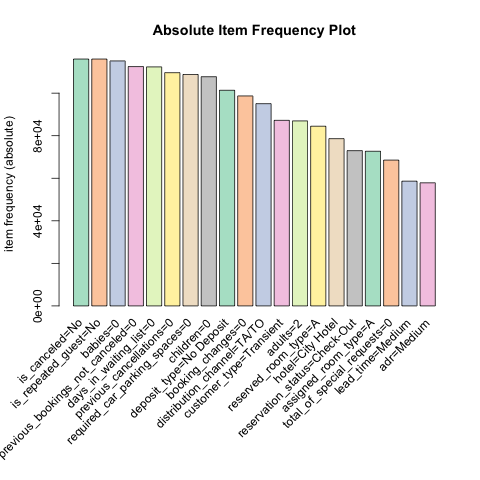

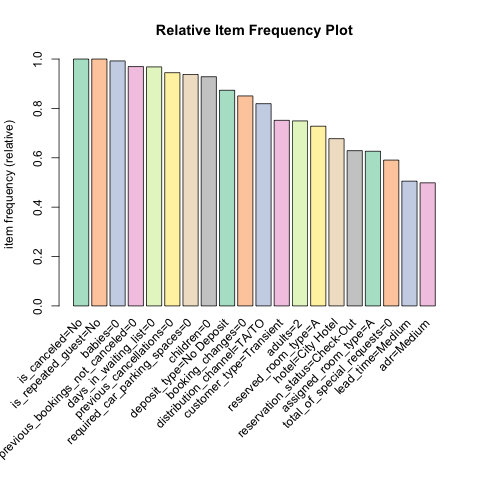

In [153]:
%%R 
itemFrequencyPlot(trans,topN=20,type="absolute",col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")
itemFrequencyPlot(trans,topN=20,type="relative",col=brewer.pal(8,'Pastel2'), main="Relative Item Frequency Plot")


# 1. Business Understanding  <a id='business-understanding'/>

## `Purpose of Data Selected`

We selected the hotel data set to investigate the associations for bookings that are canceled, the associations of booking city hotel vs a resort hotel, as well as what are the associations for an expensive vs inexpensive booking. To do so we will be exeucting an association rule learning alogirthm that could provide insights on what variables make it more likely for cancellaiton, which variables make it more likely for a customer to book a hotel in the city vs a resort hotel, and which variables make a booking more or less expensive for customer.

## `How will you measure the effectiveness of a good algorithm? `

We will be measuring the effectiveness of a rule we will inspect the confidence of each rule, or how likely is the the left hand side of the rule produced our desired right hand side. 

## `Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?`

# 2. Data Understanding <a id = '#data-understanding'/>

## Part 1 <a id ='#data-understanding-part1'/>

### `Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>





### `Verify data quality`

#### `Missing values?`
Upon initial inspection of the 31 attributes, we noticed the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__” and “__company__” attributes as they do not provide any valuable information for analysis
3. we decided to replace '__Undefined__' with '__SC__' under Meal attribute as they are synonymous. 
4. We classify the non-categorical attributes that are above and below 1.5 times the interquartile range of the dataset as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* agent- 16340
* company- 112593
* children- 4
* country- 488
* market_segment - 2
* meal - 1169
* distribution_channel – 5

There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 
4. For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


To simplify our data exploration, we decided to __remove__ the __agent and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. 
Data cleaning for the above attributes will be followed. 

#### `Outliers`
##### Outlier removal
- First we decided to take a look the simple statistics of the continuous variables to see if they make sense. 
- __adr__ and __lead_time__ had minimum and maximum values that appear as data entry error.  
- __stays_in_week_nights__ and __stays_in_weekend_nights__ had too extreme maximum values when there are only seven days in a week. 
- __days_in_waiting_list__, __total_of_special_requests__ and __required_car_parking_spaces__ had reasonable data distribution. 
- After determining that the 4 continuous features(adr, lead_time, stays_week_nights, stays_weekend_nights) have extreme outliers, the 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed

# 3. Modeling and Evaluation

In [ ]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)

arules = importr('arules') # same as importing in R with the "library" command
arules_viz = importr('arulesViz') # visualize the different rules

hotel_bookings_transform.to_csv('output.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


,X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
1,0,1,0,342,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,182
2,1,1,0,737,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,182
3,2,1,0,7,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,182
4,3,1,0,13,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,182
5,4,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,182
6,5,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,182


## Train and adjust parameters

## Rules for LHS (All the variables) vs RHS(ADR)

     lhs                               rhs           support confidence    coverage     lift count
[1]  {market_segment=Groups,                                                                      
      previous_cancellations=1,                                                                   
      customer_type=Contract}       => {adr=Low} 0.006023993  1.0000000 0.006023993 4.000138   699
[2]  {lead_time=High,                                                                             
      market_segment=Groups,                                                                      
      customer_type=Contract}       => {adr=Low} 0.006032611  1.0000000 0.006032611 4.000138   700
[3]  {market_segment=Groups,                                                                      
      customer_type=Contract,                                                                     
      reservation_status=Canceled}  => {adr=Low} 0.006032611  0.9985735 0.006041229 3.994432   700
[4]  {hote

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



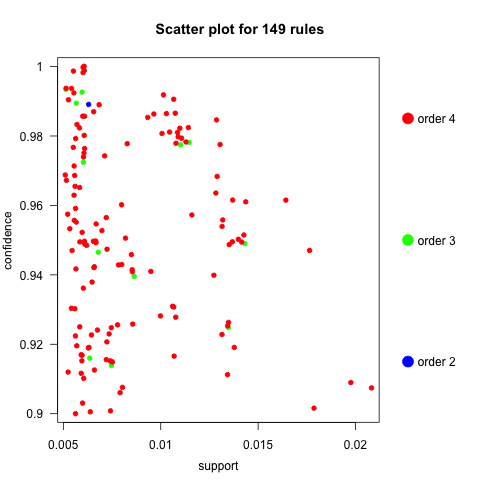

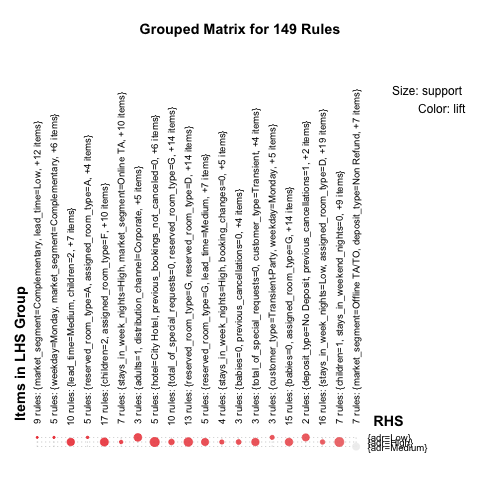

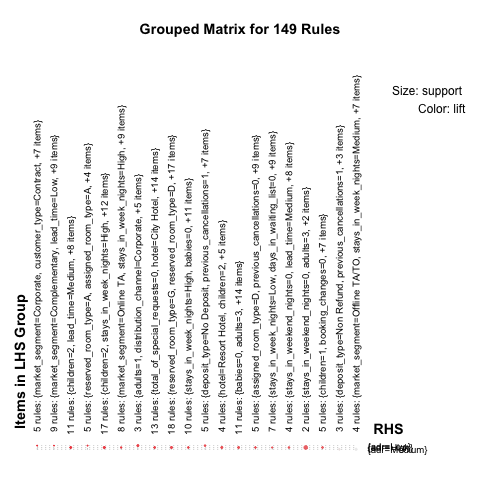

In [158]:
%%R
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"),default="lhs"))
summary(rules)
rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
#rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.95]

inspect(sort(rules, by = 'lift')[1:10])

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
#plot(rules_pruned, method="graph")
plot(rules_pruned, method="grouped matrix")
#plot(rules_pruned, method="matrix3D")
#plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))


## Rules for LHS(All the variables) vs RHS(is_canceled)

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



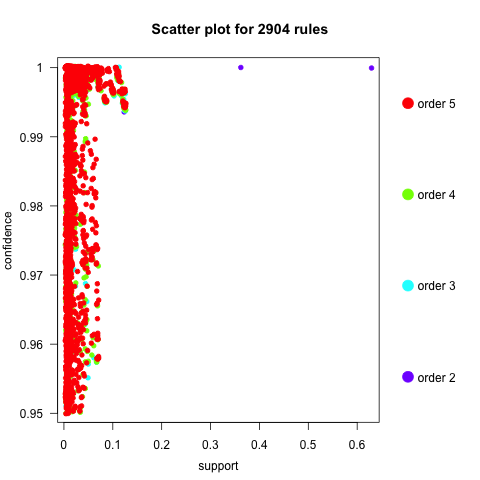

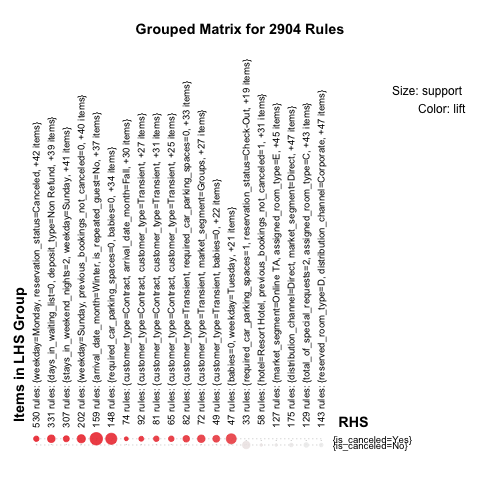

In [64]:
%%R
rules <- apriori(trans,parameter=list(minlen=2, maxlen=5,support=.005, confidence=.95), control = list(verbose=F),appearance = list(rhs=c("is_canceled=No","is_canceled=Yes"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
#length(rules_pruned)
#inspect(rules_pruned,by="lift")

# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord")

IGRAPH 3f7f996 DN-- 24 33 -- 
+ attr: name (v/c), label (v/c), support (v/n), confidence (v/n),
| coverage (v/n), lift (v/n), count (v/n), order (v/n)
+ edges from 3f7f996 (vertex names):
 [1] 336   ->assoc1  334   ->assoc2  59    ->assoc3  316   ->assoc3 
 [5] 59    ->assoc4  187   ->assoc4  187   ->assoc5  318   ->assoc5 
 [9] 1     ->assoc6  47    ->assoc6  316   ->assoc6  47    ->assoc7 
[13] 59    ->assoc7  338   ->assoc7  7     ->assoc8  59    ->assoc8 
[17] 338   ->assoc8  54    ->assoc9  59    ->assoc9  339   ->assoc9 
[21] 47    ->assoc10 59    ->assoc10 341   ->assoc10 assoc1->4      
[25] assoc2->4       assoc3->4       assoc4->4       assoc5->4      
+ ... omitted several edges


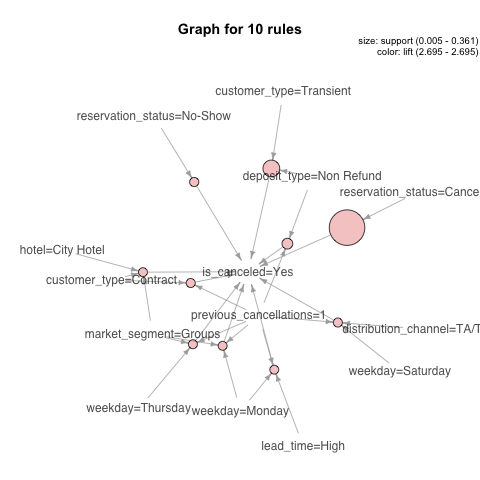

In [32]:
%%R
library(htmlwidgets)
library(IRdisplay)
library(plotly)


top10Rules <- head(rules_pruned, n = 10, by = "confidence")
p <- plot(top10Rules, method = "graph")
#html_plot(p,out=paste0("demo",".html"))
#saveWidget(p, 'demo.html', selfcontained=FALSE)
p
#saveAsGraph(head(rules_pruned, n = 100, by = "lift"), file = "rules.graphml")

## Rules for LHS(All the variables) vs RHS(Hotel - Resort)

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



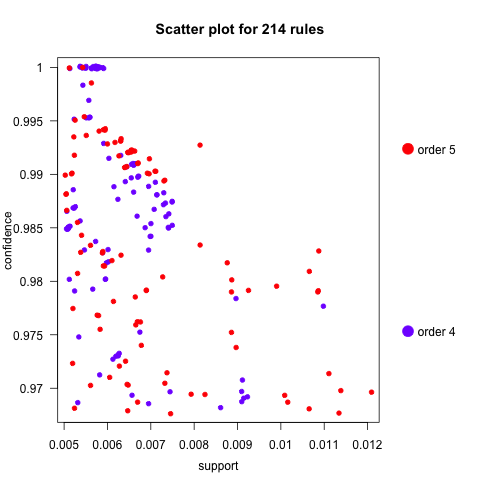

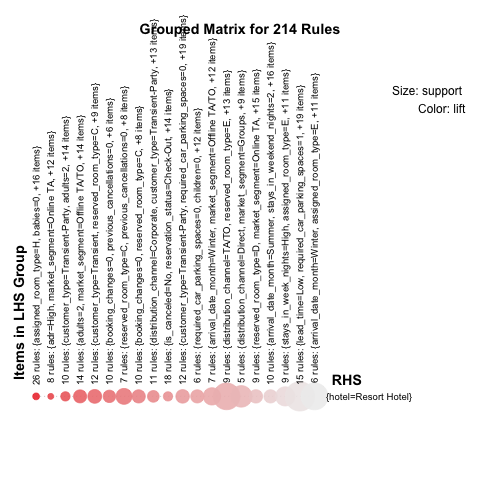

In [34]:
%%R
rules <- apriori(trans,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=Resort Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3.0]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
#plot(rules_pruned, method="graph")
#plot(rules_pruned, method="grouped matrix")
#plot(rules_pruned, method="matrix3D")
#plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(Hotel - Resort)


R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



     lhs                                 rhs                      support confidence    coverage     lift count
[1]  {reserved_room_type=H}           => {hotel=Resort Hotel} 0.005294814  1.0000000 0.005294814 4.145264   228
[2]  {assigned_room_type=H}           => {hotel=Resort Hotel} 0.005434152  1.0000000 0.005434152 4.145264   234
[3]  {reserved_room_type=C,                                                                                    
      customer_type=Transient,                                                                                 
      adr=High}                       => {hotel=Resort Hotel} 0.005457374  1.0000000 0.005457374 4.145264   235
[4]  {previous_cancellations=0,                                                                                
      reserved_room_type=C,                                                                                    
      adr=High}                       => {hotel=Resort Hotel} 0.005666380  1.0000000 0.005666380 4.14526

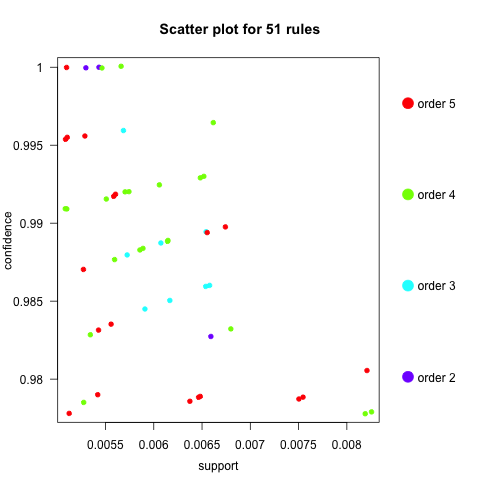

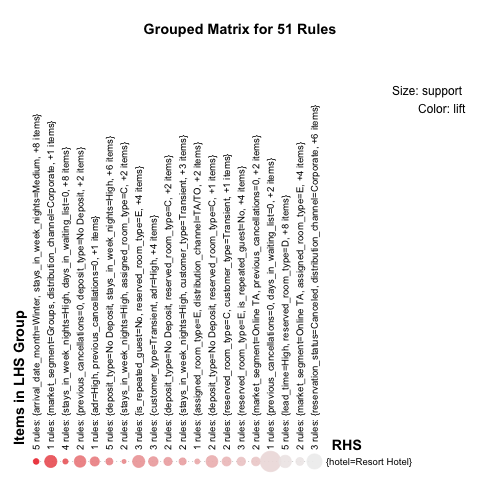

In [46]:
%%R
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=Resort Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>4.05 ]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
top10Rules <- head(rules_pruned, n = 10, by = "confidence")
inspect(top10Rules)

## Rules for LHS(All the variables) vs RHS(Hotel - City)

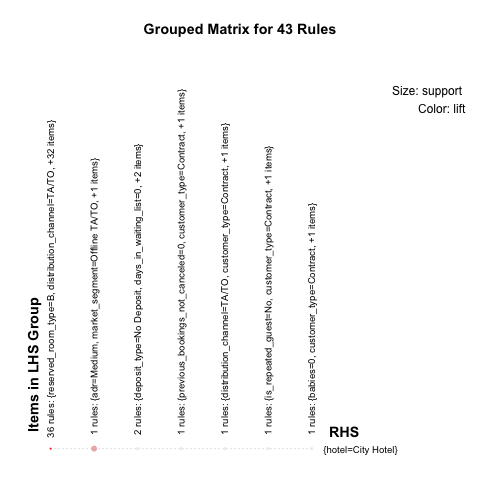

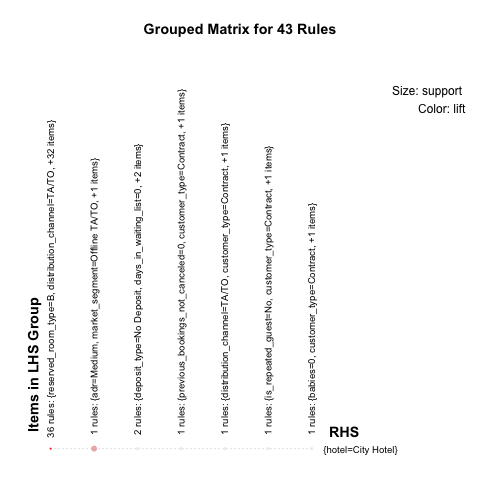

In [38]:
%%R
rules <- apriori(trans,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=City Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>1.475]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots

plot(rules_pruned, method="grouped matrix")
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(Hotel - City)

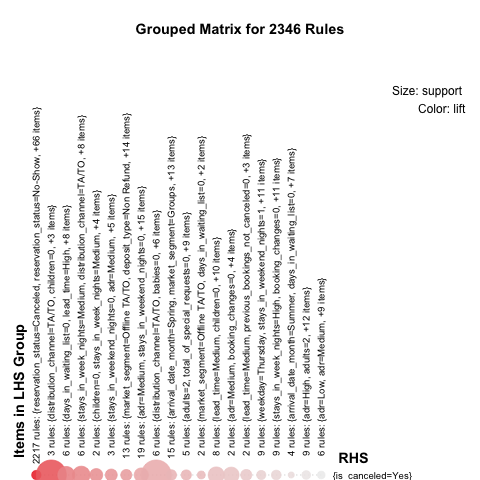

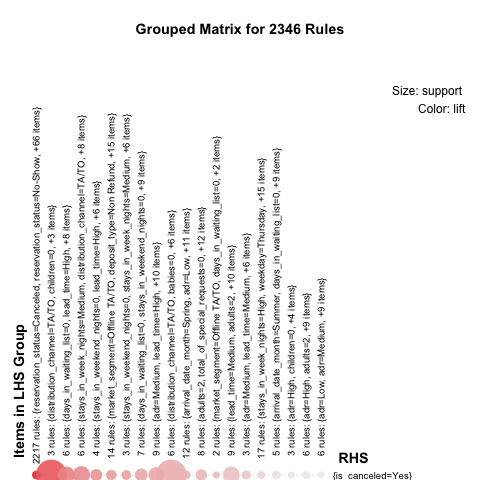

In [39]:
%%R
trans_cancel <- as(bookings[bookings$hotel == "City Hotel", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("is_canceled=Yes"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>2.40507]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")

# Plots
plot(rules_pruned, method="grouped matrix")
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(All the variables) vs RHS(Hotel - Resort)

      lhs                                   rhs                      support confidence    coverage     lift count
[1]   {assigned_room_type=H,                                                                                      
       deposit_type=No Deposit,                                                                                   
       customer_type=Transient}          => {hotel=Resort Hotel} 0.005472440  1.0000000 0.005472440 3.100494   635
[2]   {previous_cancellations=0,                                                                                  
       assigned_room_type=H,                                                                                      
       customer_type=Transient}          => {hotel=Resort Hotel} 0.005437968  1.0000000 0.005437968 3.100494   631
[3]   {is_repeated_guest=No,                                                                                      
       assigned_room_type=H,                                                    

       reserved_room_type=C,                                                                                      
       adr=High}                         => {hotel=Resort Hotel} 0.005593092  0.9969278 0.005610328 3.090969   649
[25]  {reserved_room_type=C,                                                                                      
       deposit_type=No Deposit,                                                                                   
       adr=High}                         => {hotel=Resort Hotel} 0.005610328  0.9954128 0.005636182 3.086272   651
[26]  {reserved_room_type=C,                                                                                      
       days_in_waiting_list=0,                                                                                    
       adr=High}                         => {hotel=Resort Hotel} 0.005601710  0.9954058 0.005627564 3.086250   650
[27]  {previous_bookings_not_canceled=0,                                        

[48]  {is_repeated_guest=No,                                                                                      
       previous_cancellations=0,                                                                                  
       reserved_room_type=C}             => {hotel=Resort Hotel} 0.007325313  0.9883721 0.007411493 3.064442   850
[49]  {reserved_room_type=C,                                                                                      
       assigned_room_type=C,                                                                                      
       days_in_waiting_list=0}           => {hotel=Resort Hotel} 0.007127098  0.9880526 0.007213279 3.063451   827
[50]  {reserved_room_type=C,                                                                                      
       assigned_room_type=C,                                                                                      
       deposit_type=No Deposit}          => {hotel=Resort Hotel} 0.007109862  0.

       reservation_status=Check-Out}     => {hotel=Resort Hotel} 0.005093247  0.9850000 0.005170809 3.053987   591
[72]  {is_canceled=No,                                                                                            
       previous_cancellations=0,                                                                                  
       reserved_room_type=C}             => {hotel=Resort Hotel} 0.005084629  0.9849750 0.005162191 3.053909   590
[73]  {previous_cancellations=0,                                                                                  
       reserved_room_type=C,                                                                                      
       reservation_status=Check-Out}     => {hotel=Resort Hotel} 0.005084629  0.9849750 0.005162191 3.053909   590
[74]  {is_canceled=No,                                                                                            
       reserved_room_type=C,                                                    

       assigned_room_type=C,                                                                                      
       adr=Low}                          => {hotel=Resort Hotel} 0.005351787  0.9748823 0.005489676 3.022617   621
[96]  {stays_in_weekend_nights=2,                                                                                 
       previous_cancellations=0,                                                                                  
       assigned_room_type=C}             => {hotel=Resort Hotel} 0.006265297  0.9732262 0.006437657 3.017482   727
[97]  {stays_in_weekend_nights=2,                                                                                 
       is_repeated_guest=No,                                                                                      
       assigned_room_type=C}             => {hotel=Resort Hotel} 0.006239443  0.9731183 0.006411803 3.017148   724
[98]  {stays_in_weekend_nights=2,                                               

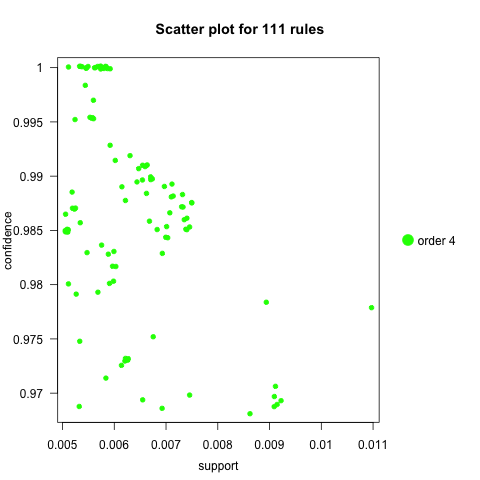

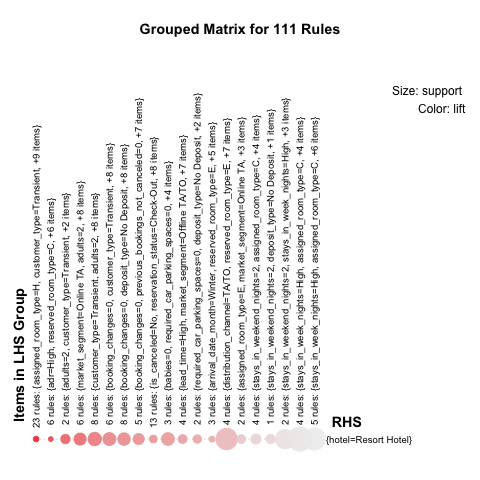

In [40]:
%%R
rules <- apriori(trans,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=Resort Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3.0]
summary(rules_pruned)

length(rules_pruned)
inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(customer_type - Transient Party(Family, friends))


R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



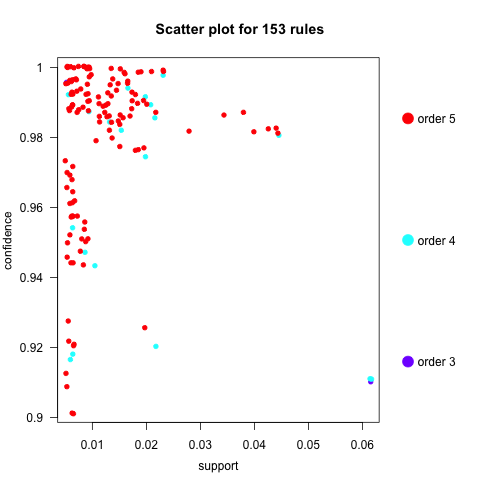

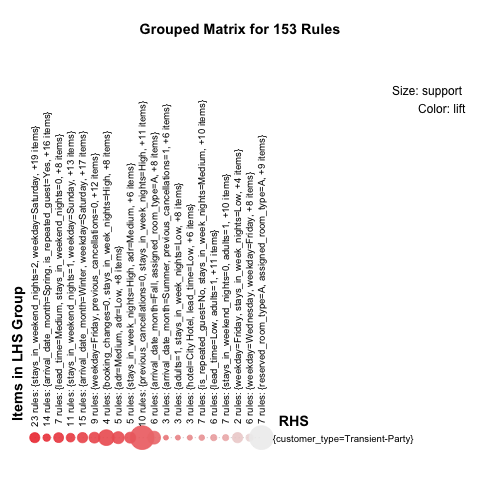

In [41]:
%%R
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("customer_type=Contract", "customer_type=Group", "customer_type=Transient","customer_type=Transient-Party"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3 & quality(rules_pruned)$lift<30 ]
summary(rules_pruned)
#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(customer_type - Contract (Company or Government))


R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



     lhs                              rhs                          support confidence    coverage     lift count
[1]  {stays_in_week_nights=Medium,                                                                              
      is_repeated_guest=No,                                                                                     
      previous_cancellations=1,                                                                                 
      weekday=Thursday}            => {customer_type=Contract} 0.007942221  0.8260870 0.009614268 29.89255   342
[2]  {stays_in_week_nights=Low,                                                                                 
      market_segment=Groups,                                                                                    
      previous_cancellations=1,                                                                                 
      weekday=Monday}              => {customer_type=Contract} 0.007895776  0.6813627 0.01158821

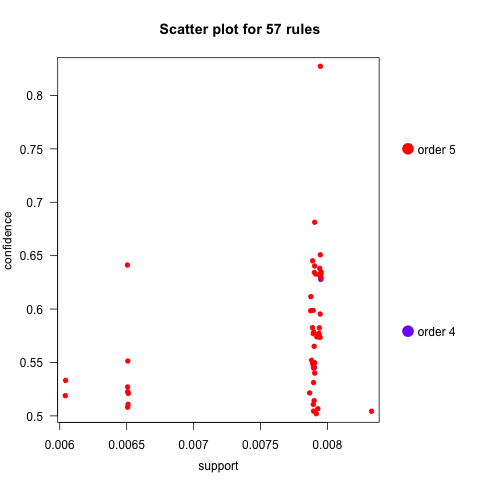

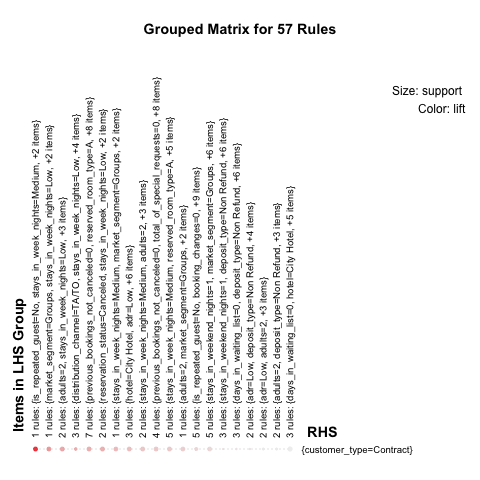

In [48]:
%%R
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.5), control = list(verbose=F),appearance = list(rhs=c("customer_type=Contract"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3 & quality(rules_pruned)$lift<30 ]
summary(rules_pruned)
#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
inspect(head(rules_pruned, n = 10, by = "confidence"))

## Rules for LHS(Time related variables) vs RHS(ADR)

    lhs                                           rhs       support    
[1] {stays_in_weekend_nights=0,weekday=Monday} => {adr=Low} 0.001034162
    confidence coverage    lift     count
[1] 1          0.001034162 3.000129 120  


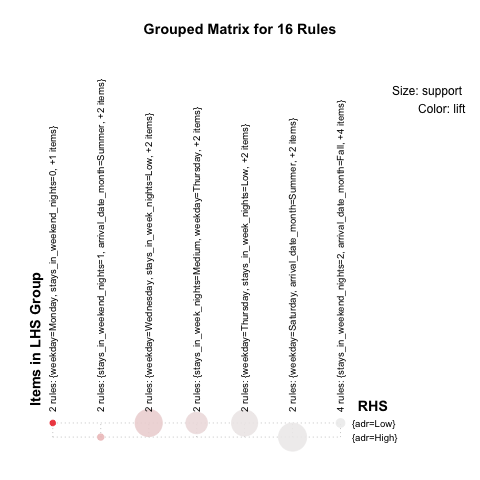

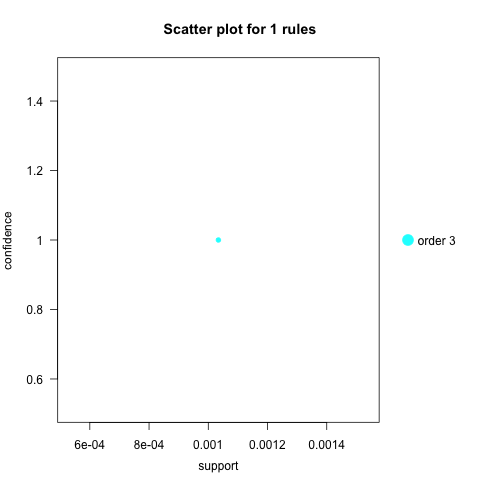

In [56]:
%%R

rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.0005, confidence=.7), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"), lhs=c("stays_in_week_nights=Low","stays_in_week_nights=Medium","stays_in_week_nights=High", "stays_in_weekend_nights=0","stays_in_weekend_nights=1", "stays_in_weekend_nights=2",  "stays_in_weekend_nights=3","stays_in_weekend_nights=4", "arrival_date_month=Spring","arrival_date_month=Summer","arrival_date_month=Fall","arrival_date_month=Winter","weekday=Monday", "weekday=Tuesday","weekday=Wednesday","weekday=Thursday","weekday=Friday","weekday=Saturday","weekday=Sunday"),default="none"))
                                                                                                              
                                                                                                              
summary(rules)
plot(rules, method="grouped matrix")

rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.95]

 
length(rules_pruned)  
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
#plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
#plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
inspect(head(rules_pruned, n = 10, by = "confidence"))


## Rules for LHS(Reservation type) vs RHS(ADR)


Itemsets in Antecedent (LHS)
 [1] "{hotel=City Hotel,market_segment=Groups,customer_type=Contract}"                                   
 [2] "{market_segment=Complementary,customer_type=Transient}"                                            
 [3] "{hotel=City Hotel,market_segment=Online TA,reserved_room_type=F,customer_type=Transient}"          
 [4] "{market_segment=Complementary}"                                                                    
 [5] "{hotel=City Hotel,market_segment=Online TA,distribution_channel=TA/TO,reserved_room_type=F}"       
 [6] "{hotel=City Hotel,market_segment=Online TA,reserved_room_type=F}"                                  
 [7] "{hotel=City Hotel,distribution_channel=TA/TO,reserved_room_type=F,customer_type=Transient}"        
 [8] "{hotel=City Hotel,distribution_channel=TA/TO,reserved_room_type=F}"                                
 [9] "{market_segment=Groups,reserved_room_type=A,customer_type=Contract}"                               
[10] "{market_seg

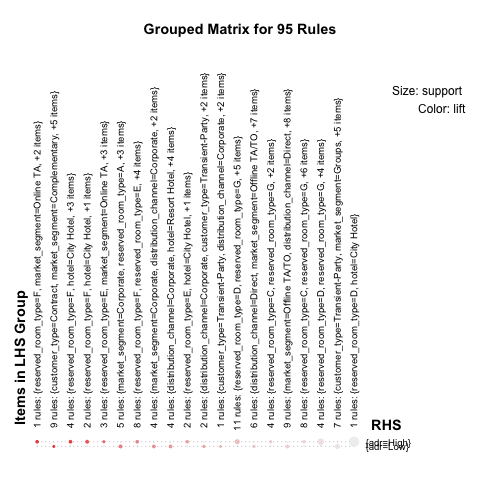

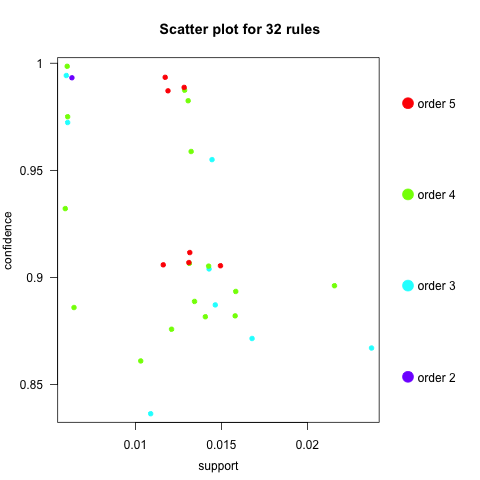

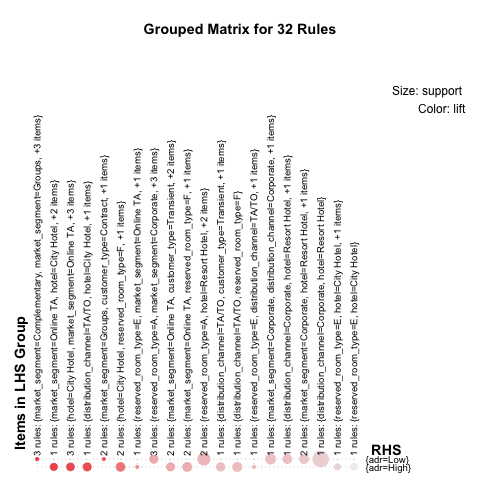

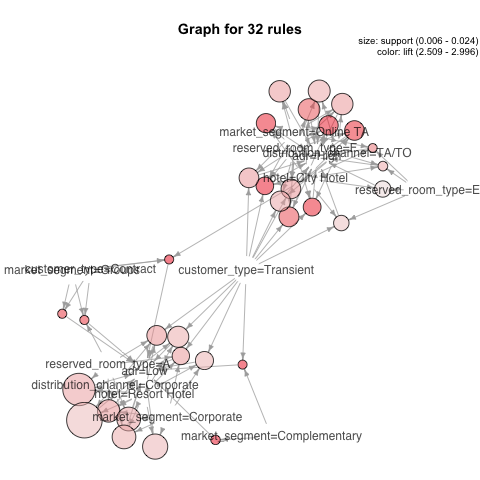

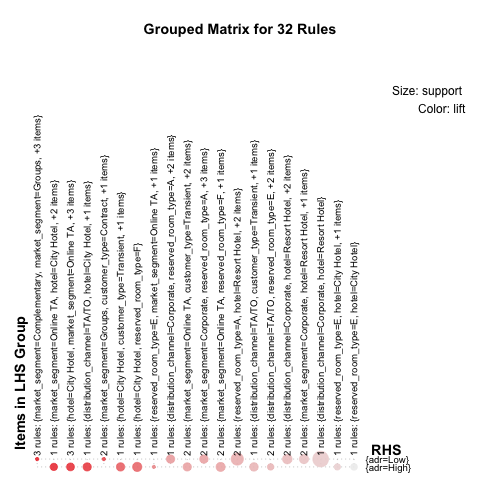

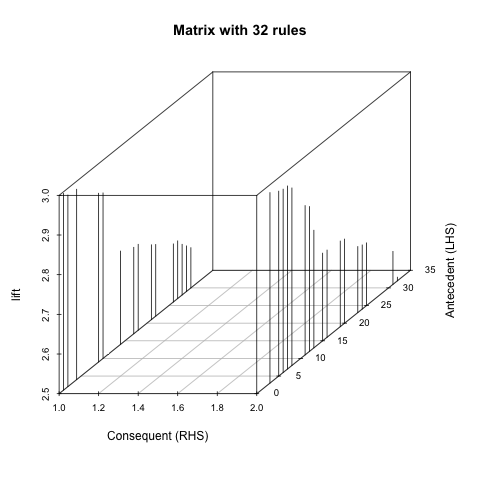

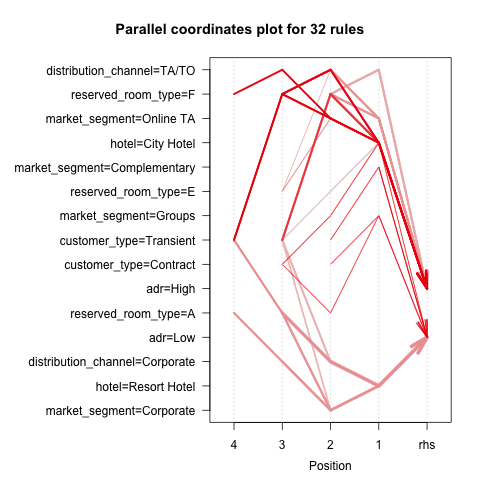

In [70]:
%%R
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.7), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"), lhs=c("market_segment=Aviation","market_segment=Complementary", "market_segment=Corporate", "market_segment=Direct", "market_segment=Groups", "market_segment=Offline TA/TO", "market_segment=Online TA", "customer_type=Contract", "customer_type=Group", "customer_type=Transient","customer_type=Transient-Party","reserved_room_type=A","reserved_room_type=B","reserved_room_type=C","reserved_room_type=D","reserved_room_type=E","reserved_room_type=F", "reserved_room_type=G", "reserved_room_type=H", "reserved_room_type=L", "reserved_room_type=P", "distribution_channel=Corporate","distribution_channel=Direct", "distribution_channel=GDS", "distribution_channel=TA/TO", "hotel=Resort Hotel","hotel=City Hotel"),default="none"))
                                                                                                          
                                                                                                           
summary(rules)
plot(rules, method="grouped matrix")

rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.5]

length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
plot(rules_pruned, method="graph")
plot(rules_pruned, method="grouped matrix")
plot(rules_pruned, method="matrix3D")
plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
inspect(head(rules_pruned, n = 10, by = "confidence"))

## Evaluate and Compare

In [51]:
# Do same thing, getting only the maximal sets
%R is_max <- isets[is.maximal(isets)]
%R inspect(head(sort(is_max, by="support")))
%R length(is_max)

    items                                   support transIdenticalToItemsets  count
[1] {children=[0,10],                                                              
     babies=[0,10],                                                                
     meal=[0,3],                                                                   
     distribution_channel=[0,3],                                                   
     is_repeated_guest=[0,1],                                                      
     previous_cancellations=[0,26],                                                
     previous_bookings_not_canceled=[0,72],                                        
     reserved_room_type=[0,9],                                                     
     deposit_type=[0,2],                                                           
     days_in_waiting_list=[0,391]}                1                        0 119390
[2] {children=[0,10],                                                       

array([42471], dtype=int32)

In [50]:
%R rules <- apriori(trans, parameter=list(support=.5, confidence=.9))
#%R rules <- apriori( trans, list(minlen=1, supp=0.01, conf=0.01)

%R inspect(head(rules, n=100))

# print out measures of rule quality
%R quality(head(rules))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59695 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[52 item(s), 119390 transaction(s)] done [0.21s].
sorting and recoding items ... [21 item(s)] done [0.02s].
creating transaction tree ... done [0.09s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.39s].
writing ... [1615673 rule(s)] done [0.81s].
creating S4 object  ... done [0.66s].
      lhs                                  rhs                                       support confidence  coverage      lift  count
[1]   {}                                => {customer_type=[2,3]}                   0.9610269  0.9610269 1.0000000 1.0000000 114737
[2]

,support,confidence,coverage,lift,count
1,0.961027,0.961027,1.0,1.0,114737
2,1.000000,1.000000,1.0,1.0,119390
3,1.000000,1.000000,1.0,1.0,119390
4,1.000000,1.000000,1.0,1.0,119390
5,1.000000,1.000000,1.0,1.0,119390
6,1.000000,1.000000,1.0,1.0,119390


In [54]:
# sort out the rules and print additional "interest" measures
%R rules <- sort(rules, by="lift")
%R inspect(head(rules, n=100))w
%R interestMeasure(rules[1:100], method=c("phi", "gini"), trans=trans)

      lhs                                        rhs                     support confidence  coverage     lift count
[1]   {total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[2]   {reserved_room_type=[0,9],                                                                                    
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[3]   {previous_bookings_not_canceled=[0,72],                                                                       
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[4]   {previous_cancellations=[0,26],                                                                               
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[5]   {is_repeated_guest=[0,1],                                 

       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[53]  {is_repeated_guest=[0,1],                                                                                     
       deposit_type=[0,2],                                                                                          
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[54]  {meal=[0,3],                                                                                                  
       is_repeated_guest=[0,1],                                                                                     
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[55]  {babies=[0,10],                                                                                               
       is_repeated_guest=[0,1],                                 

       days_in_waiting_list=[0,391],                                                                                
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898
[100] {booking_changes=[0,21],                                                                                      
       days_in_waiting_list=[0,391],                                                                                
       total_of_special_requests=[0,1)}       => {customer_type=[2,3]} 0.5687076  0.9655849 0.5889773 1.004743 67898


R[write to console]: Error in "factor" %in% attrib[["class", exact = TRUE]] : 
  node stack overflow

R[write to console]: In addition: 
R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 




Error in "factor" %in% attrib[["class", exact = TRUE]] : 
  node stack overflow


## Visualize Results

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



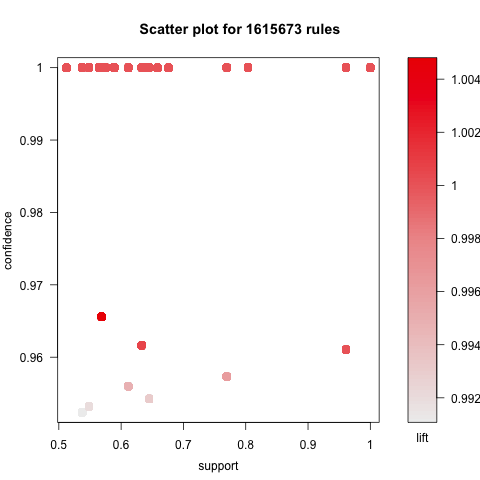

In [56]:

# visualize the different rules, 
#  the first visualization might take some time to render properly
%R library(arulesViz)
%R plot(rules)

In [ ]:

# a great plot
%R plot(rules, method="grouped")
%R inspect(rules)
%R length(rules)

## Summarize the Ramifications

# 4. Deployment

# 5. Exceptional Work